# Dataset overview

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction


> *Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.*





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [107]:
data = pd.read_csv('heart.csv')

In [3]:
def bar_donut_chart(variable):
    colors = ['#6CB4EE', '#318CE7', '#6495ED', '#87CEFA']

    category_counts = data[variable].value_counts()

    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    bars = axs[0].barh(category_counts.index, category_counts.values, color=colors)
    axs[0].set_title(f'{variable} Distribution', fontsize=16)
    axs[0].set_xlabel('Count')
    axs[0].set_ylabel(f'{variable} Types')

    for bar, value in zip(bars, category_counts.values):
        width = bar.get_width()
        axs[0].text(width, bar.get_y() + bar.get_height() / 2, '%d' % int(width),
                    ha='left', va='center', color='black', fontsize=10)

    status_counts = data[variable].value_counts()

    wedges, texts, autotexts = axs[1].pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    plt.gca().add_artist(centre_circle)

    axs[1].axis('equal')

    plt.tight_layout()
    plt.show()

In [27]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Attribute Information**

1.   Age
2.   Sex [Male, Female]
3.   ChestPainType [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.   RestingBP: resting blood pressure [mm Hg]
5.   Cholesterol: serum cholesterol [mm/dl]
6.   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.  Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.  ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.  HeartDisease [1: heart disease, 0: Normal]

In [ ]:
# checking for total null values

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**There are no null values.**

# Check features effect on target variable

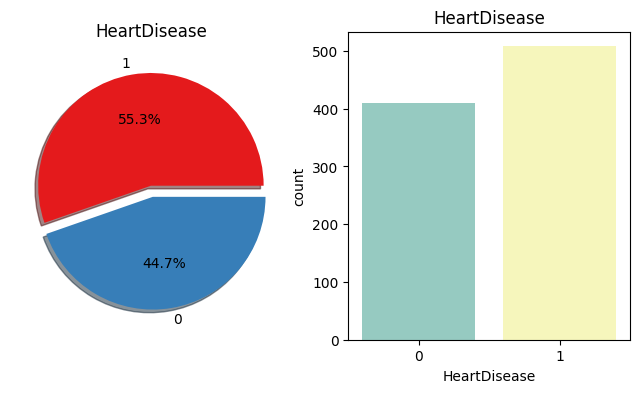

In [5]:
# Check how many have heart disease

# Create subplots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# Piechart for the first subplot
data['HeartDisease'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, colors=sns.color_palette('Set1'))
ax[0].set_title('HeartDisease')
ax[0].set_ylabel('')

# Countplot for the second subplot
sns.countplot(data, x='HeartDisease', ax=ax[1], palette='Set3')
ax[1].set_title('HeartDisease')

plt.show()

In [ ]:
data.HeartDisease.value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

We can see that **more than a half have heart disease**.
Out of 918 observations 410 without disease.


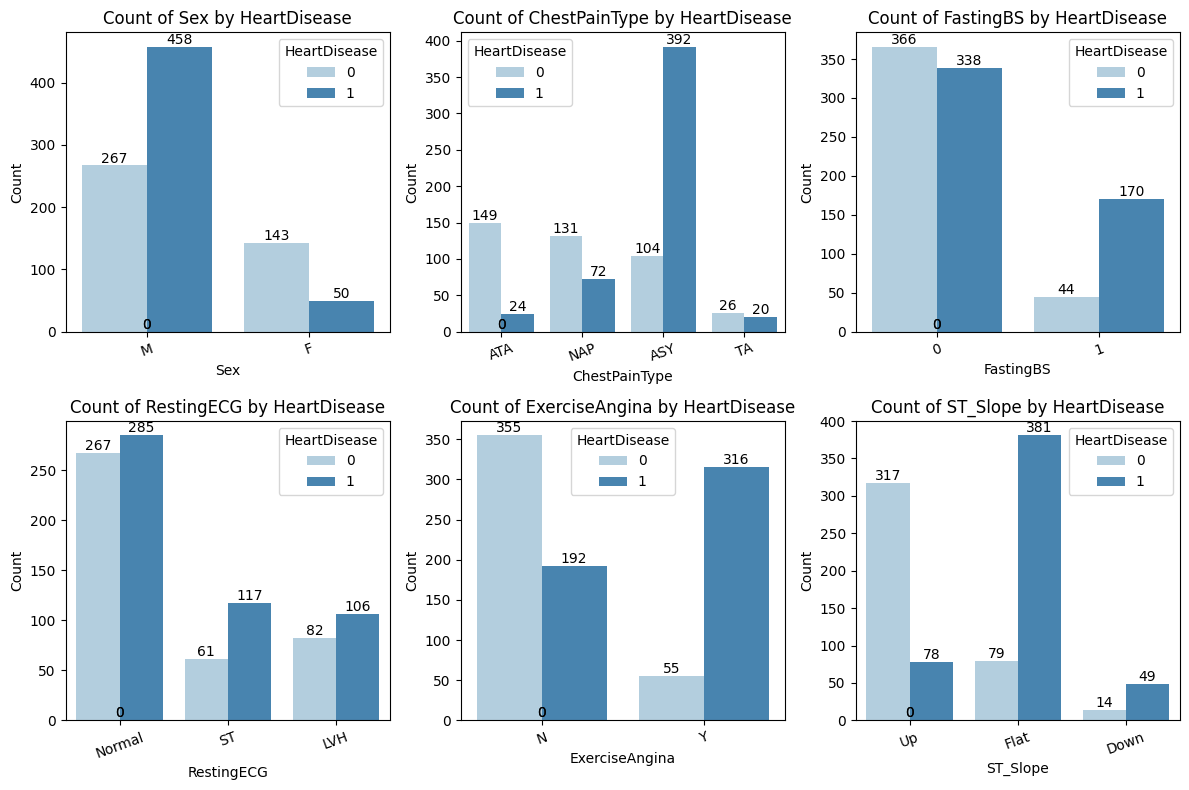

In [6]:
#Binary & Categorical Variables
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

num_features = len(categorical_features)
num_rows = (num_features - 1) // 3 + 1
num_cols = min(num_features, 3)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 8))

for i, feature in enumerate(categorical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]

    sns.countplot(data=data, x=feature, hue='HeartDisease', ax=ax, palette='Blues')
    ax.set_title(f'Count of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=20)

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5),
                    textcoords='offset points',
                    color='black')

for i in range(num_rows):
    for j in range(num_cols):
        if i * 3 + j >= num_features:
            fig.delaxes(axes[i, j])

plt.tight_layout()
plt.show()

*From graphs we see:*
>Observed men have higher rate of heart disease than observed women. But, in the same time the number of men in observations is lot more than the number of women.

>Asymptomatic (ASY) chest pain type correlates with detection of heart disease.

>Fasting blood sugar and resting electrocardiogram results do not appear to be associated with heart disease.

>The occurrence of exercise-induced angina is also slightly correlated with heart disease.

>The slope of the peak exercise ST segment (flat and down) may have connection with disease.

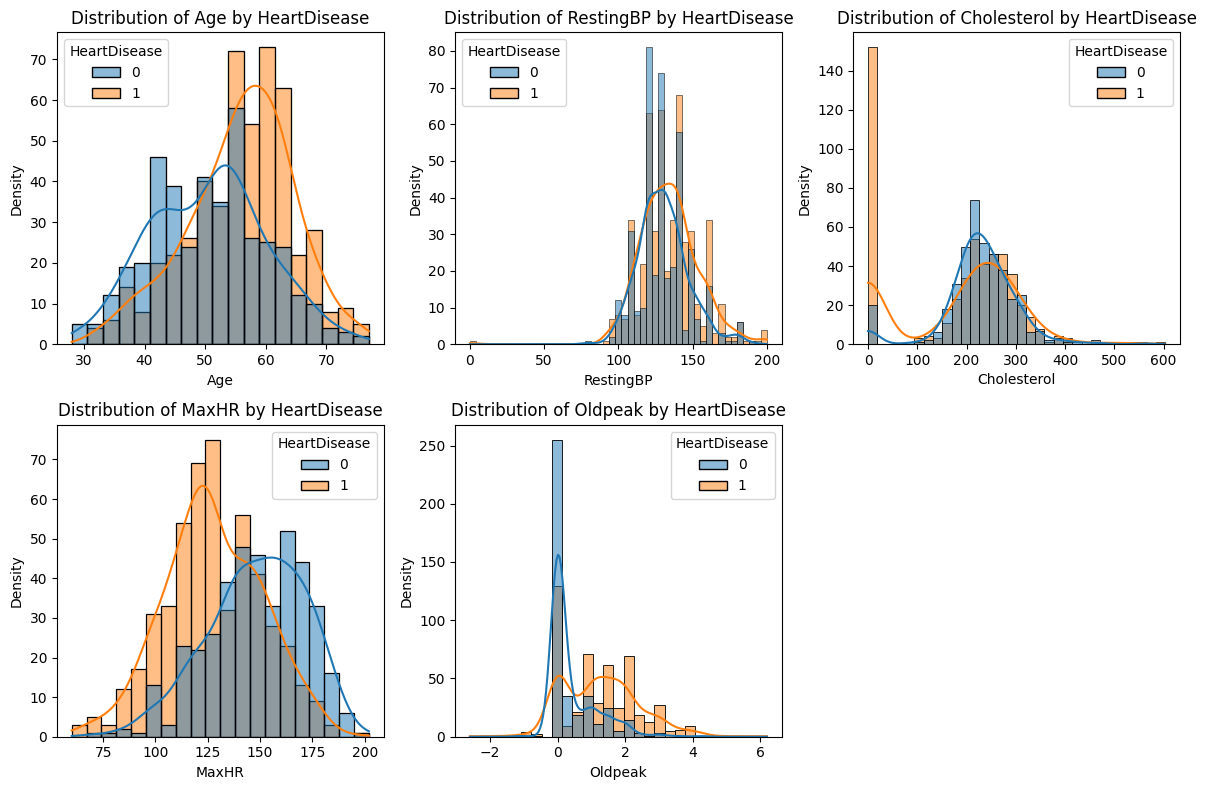

In [53]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for i, feature in enumerate(numerical_features):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=data, x=feature, hue='HeartDisease', kde=True, fill=True, ax=ax)
    ax.set_title(f'Distribution of {feature} by HeartDisease')
    ax.set_xlabel(feature)
    ax.set_ylabel('Density')

axes[1, 2].remove()

plt.tight_layout()
plt.show()

> After the age of 50, there are more people with heart disease.

> A lot of observations with 0 cholesterol level. Looks like missing data.

> People with disease have lower maximum heart rate.

> People without heart disease tend to have an oldpeak value of 0. Which generally indicates that there are no abnormal ST segment deviations suggestive of ischemia or other heart issues. Quite reasonable.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


## outliers

In [52]:
# find outliers using IQR method
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_condition = (data < lower_bound) | (data > upper_bound)
    outliers = data[outlier_condition]

    return outliers, lower_bound, upper_bound

In [54]:
outliers = {}

for i, feature in enumerate(numerical_features):
    age_outliers, age_lower_bound, age_upper_bound = find_outliers(data[feature])
    outliers.update({feature:len(age_outliers)})

pd.DataFrame(list(outliers.items()), columns=['Variable', 'Outliers'])

,Variable,Outliers
0,Age,0
1,RestingBP,28
2,Cholesterol,183
3,MaxHR,2
4,Oldpeak,16


Huge number of Cholesterol outliers. Probably, most of it 0 numbers (i.e. missing value). Wil be better to perform data imputation.

# cheast pain type, exercise angina and ST slope in heart disease

In [28]:
pd.crosstab([data.ChestPainType, data.ST_Slope],[data.ExerciseAngina, data.HeartDisease], margins=True).style.background_gradient(cmap='summer_r')

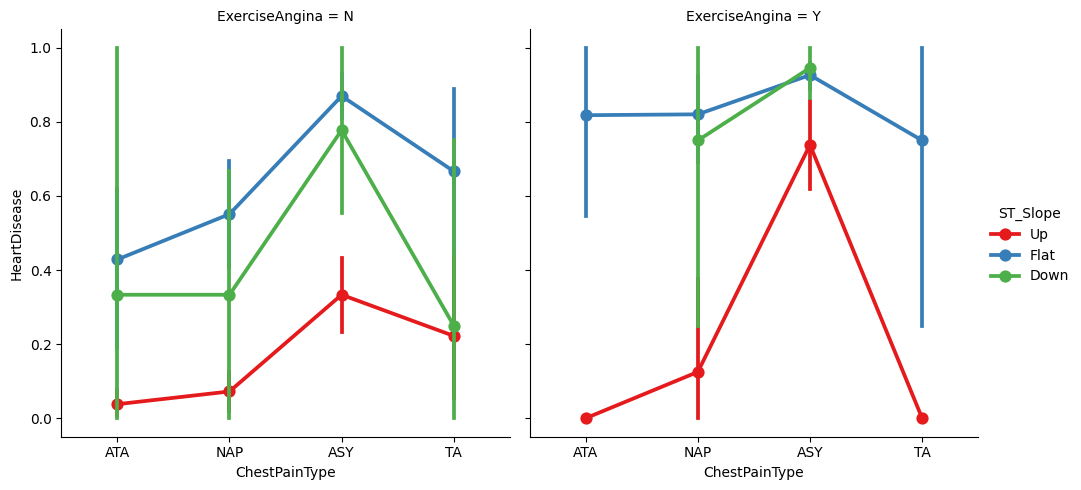

In [56]:
sns.catplot(data, x='ChestPainType', y='HeartDisease', hue='ST_Slope', col='ExerciseAngina', kind='point', palette='Set1')

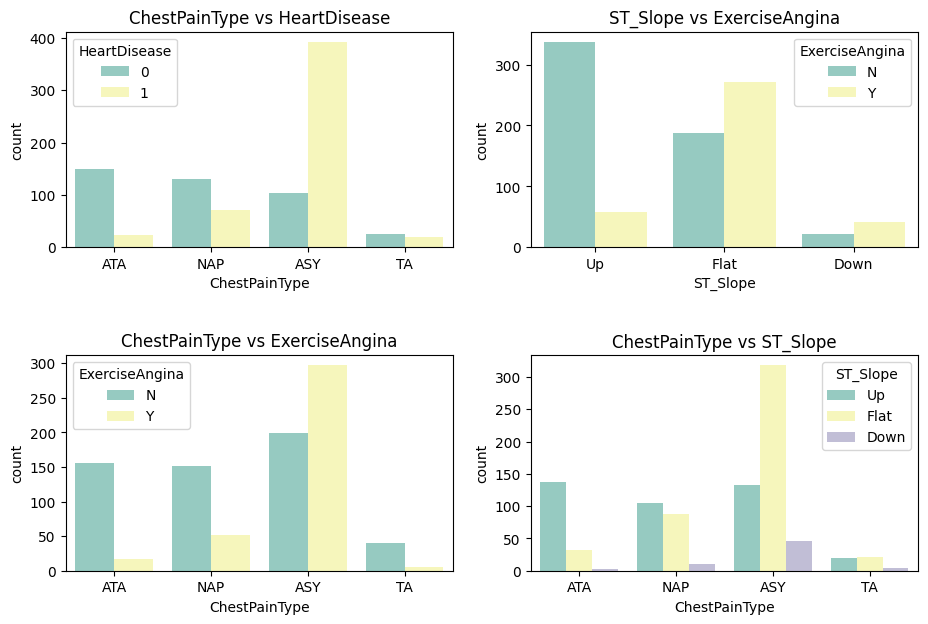

In [49]:
f, ax=plt.subplots(2,2, figsize=(11,7))

sns.countplot(data, x='ChestPainType',hue='HeartDisease', ax=ax[0,0], palette='Set3')
ax[0,0].set_title('ChestPainType vs HeartDisease')

sns.countplot(data, x='ST_Slope',hue='ExerciseAngina', ax=ax[0,1], palette='Set3')
ax[0,1].set_title('ST_Slope vs ExerciseAngina')

sns.countplot(data, x='ChestPainType', hue='ExerciseAngina', ax=ax[1,0], palette='Set3')
ax[1,0].set_title('ChestPainType vs ExerciseAngina')

sns.countplot(data, x='ChestPainType', hue='ST_Slope', ax=ax[1,1], palette='Set3')
ax[1,1].set_title('ChestPainType vs ST_Slope')

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

Observations:

1. Majority of patients with an upsloping ST slope don't have exercise-induced angina.

2. Most patients with asymptomatic chest pain have a flat ST slope. Among them there are many people with heart disease if they have exercise-induced angina.

3. Also most of the patients with a downsloping ST slope have asymptomatic chest pain. Many of them with heart disease.

# Age and maximum heart rate

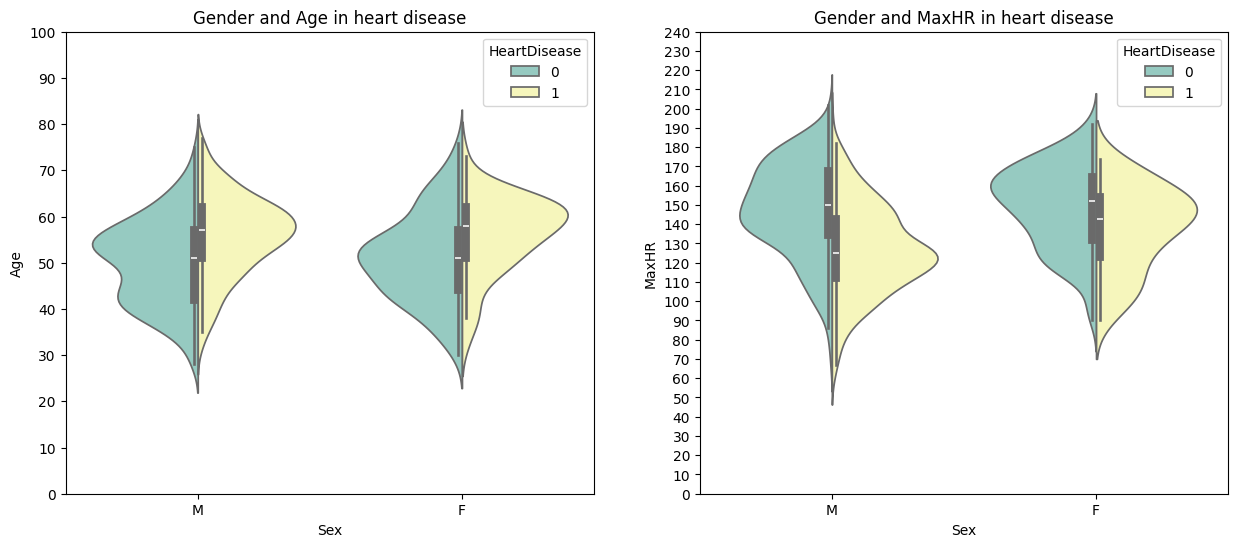

In [114]:
f, ax=plt.subplots(1,2, figsize=(15,6))

sns.violinplot(data, x="Sex", y="Age", hue="HeartDisease", split=True, ax=ax[0], palette="Set3")
ax[0].set_title('Gender and Age in heart disease')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(data, x="Sex", y="MaxHR", hue="HeartDisease", split=True, ax=ax[1], palette="Set3")
ax[1].set_title('Gender and MaxHR in heart disease')
ax[1].set_yticks(range(0, 250, 10))

plt.show()

As previously observed, after the age of 50-55 there are more people with heart disease and people with disease have lower maximum heart rate. It doesn't depend on gender.

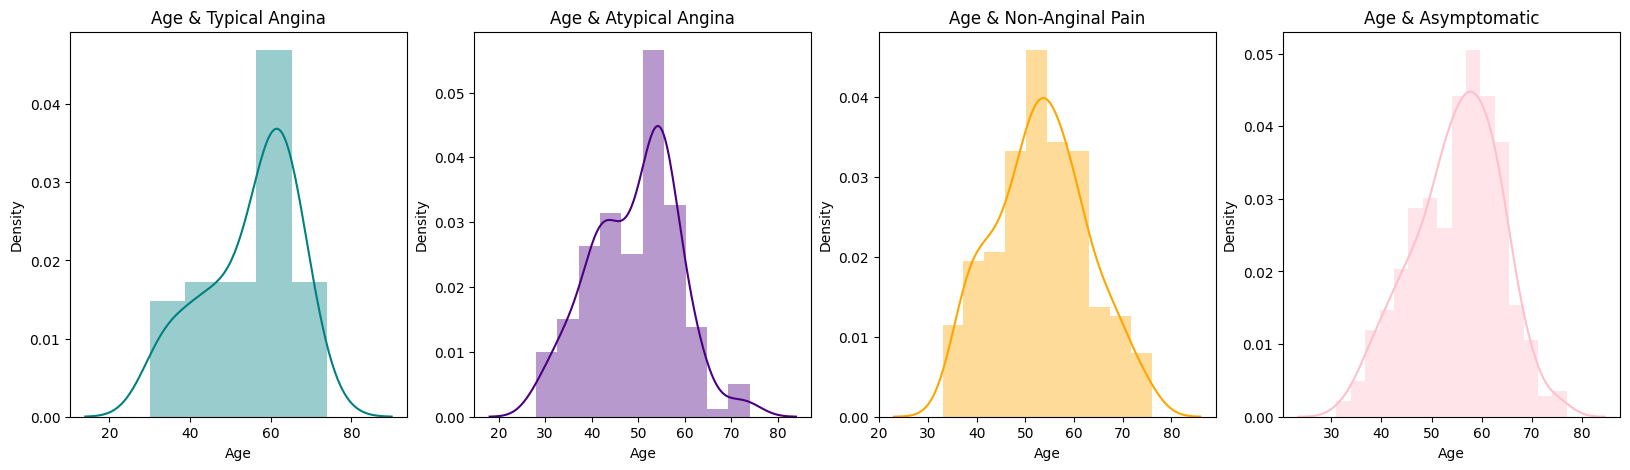

In [115]:
f, ax = plt.subplots(1,4, figsize=(20,5))

sns.distplot(data[data['ChestPainType']=='TA'].Age, ax=ax[0], color='teal')
ax[0].set_title('Age & Typical Angina')

sns.distplot(data[data['ChestPainType']=='ATA'].Age, ax=ax[1], color='indigo')
ax[1].set_title('Age & Atypical Angina')

sns.distplot(data[data['ChestPainType']=='NAP'].Age, ax=ax[2], color='orange')
ax[2].set_title('Age & Non-Anginal Pain')

sns.distplot(data[data['ChestPainType']=='ASY'].Age, ax=ax[3], color='pink')
ax[3].set_title('Age & Asymptomatic')

plt.show()

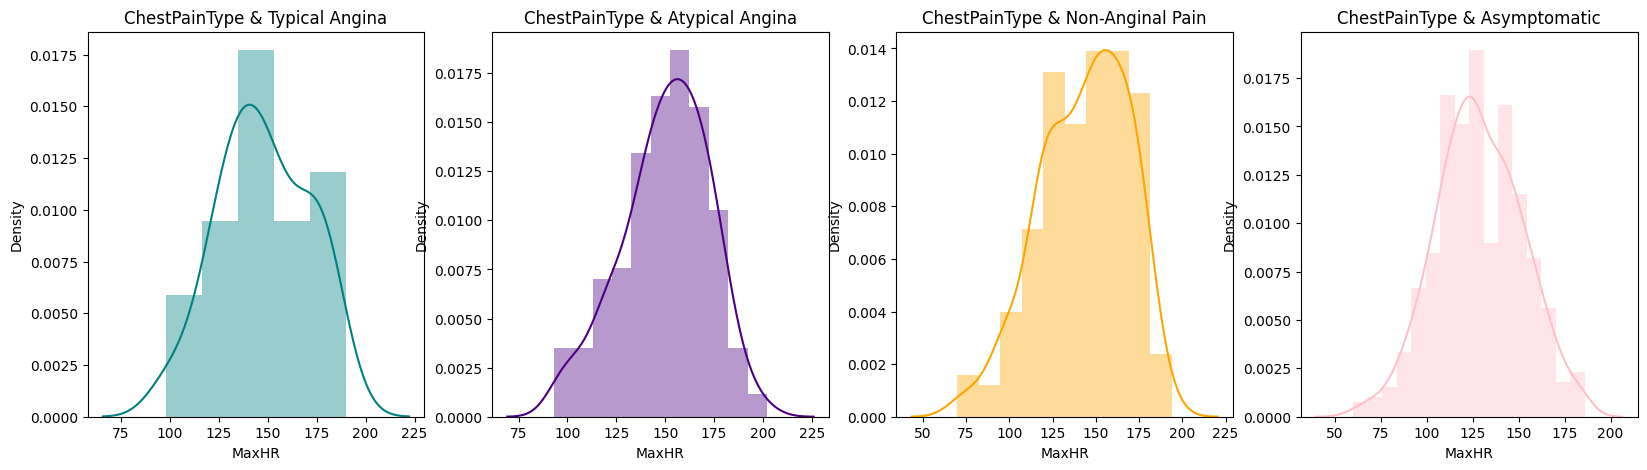

In [116]:
f, ax = plt.subplots(1,4, figsize=(20,5))

sns.distplot(data[data['ChestPainType']=='TA'].MaxHR, ax=ax[0], color='teal')
ax[0].set_title('ChestPainType & Typical Angina')

sns.distplot(data[data['ChestPainType']=='ATA'].MaxHR, ax=ax[1], color='indigo')
ax[1].set_title('ChestPainType & Atypical Angina')

sns.distplot(data[data['ChestPainType']=='NAP'].MaxHR, ax=ax[2], color='orange')
ax[2].set_title('ChestPainType & Non-Anginal Pain')

sns.distplot(data[data['ChestPainType']=='ASY'].MaxHR, ax=ax[3], color='pink')
ax[3].set_title('ChestPainType & Asymptomatic')

plt.show()

some of distributions are close to normal.

# Feature engineering

### Correlations (heatmap)

<Axes: >

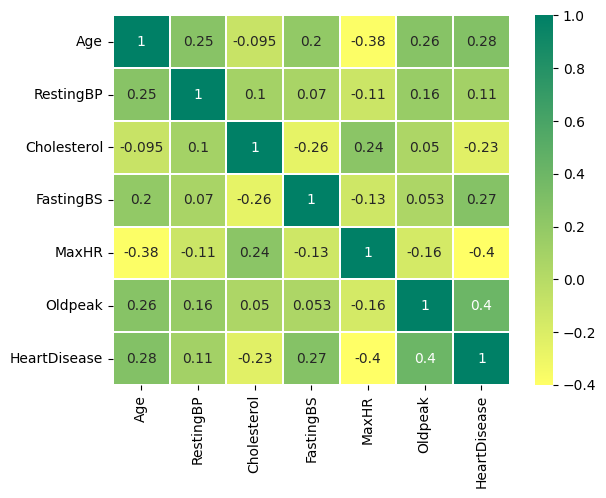

In [108]:
data_corr = data.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1)

sns.heatmap(data_corr.corr(), annot=True, cmap='summer_r', linewidths=0.2)

The numeric features are not much correlated. Nothing is redundant.

### Converting Continous Values

In [61]:
data['Age'] = pd.qcut(data['Age'], 4)
data.groupby(['Age'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='Blues')

,HeartDisease
Age,
"(27.999, 47.0]",0.355649
"(47.0, 54.0]",0.482759
"(54.0, 60.0]",0.663717
"(60.0, 77.0]",0.728507


In [97]:
data['Age_band']=0
data.loc[data['Age']<=47,'Age_band']=0
data.loc[(data['Age']>47)&(data['Age']<=54),'Age_band']=1
data.loc[(data['Age']>54)&(data['Age']<=60),'Age_band']=2
data.loc[data['Age']>60,'Age_band']=3
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_band
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1


In [70]:
data['MaxHR'] = pd.qcut(data['MaxHR'], 3)
data.groupby(['MaxHR'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='Blues')

,HeartDisease
MaxHR,
"(59.999, 125.0]",0.780186
"(125.0, 150.0]",0.555205
"(150.0, 202.0]",0.287770


In [98]:
data['MaxHR_band']=0
data.loc[data['MaxHR']<=125,'MaxHR_band']=0
data.loc[(data['MaxHR']>125)&(data['MaxHR']<=150),'MaxHR_band']=1
data.loc[data['MaxHR']>150,'MaxHR_band']=2
data.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Age_band,MaxHR_band
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,2
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,1,2


In [78]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,count
Age_band,
0,239
1,232
2,226
3,221


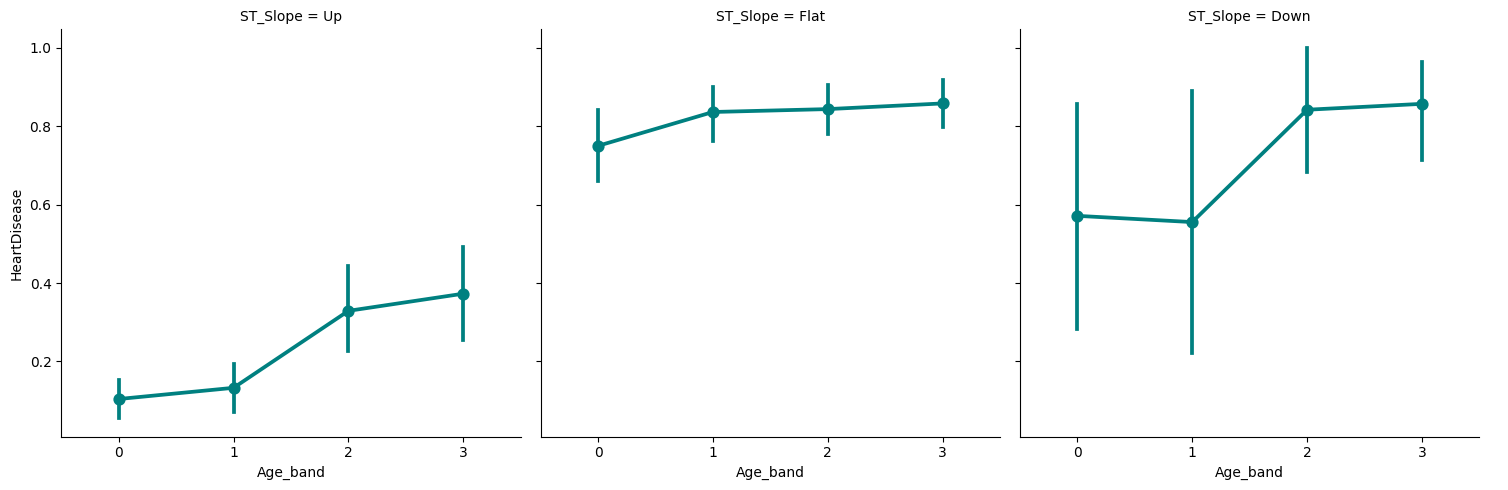

In [77]:
sns.catplot(data, x='Age_band', y='HeartDisease', col='ST_Slope', kind='point', color='teal')

In [99]:
# change 0 values
# Calculate the mean of non-zero values in the column
mean_nonzero = data[data['Cholesterol'] != 0]['Cholesterol'].mean()

# Replace incorrect 0 values with the mean of non-zero values in the same column
data['Cholesterol'] = data['Cholesterol'].replace(0, mean_nonzero)

In [90]:
data['Cholesterol'] = pd.qcut(data['Cholesterol'], 4)
data.groupby(['Cholesterol'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='Blues')

,HeartDisease
Cholesterol,
"(84.999, 214.0]",0.409483
"(214.0, 244.635]",0.660920
"(244.635, 267.0]",0.522523
"(267.0, 603.0]",0.550661


In [100]:
data['Cholesterol_band']=0
data.loc[data['Cholesterol']<=214,'Cholesterol_band']=0
data.loc[(data['Cholesterol']>214)&(data['Cholesterol']<=245),'Cholesterol_band']=1
data.loc[(data['Cholesterol']>245)&(data['Cholesterol']<=267),'Cholesterol_band']=2
data.loc[data['Cholesterol']>267,'Cholesterol_band']=3

In [80]:
data['RestingBP'] = pd.qcut(data['RestingBP'], 3)
data.groupby(['RestingBP'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='Blues')

,HeartDisease
RestingBP,
"(-0.001, 123.0]",0.495114
"(123.0, 140.0]",0.526854
"(140.0, 200.0]",0.681818


In [101]:
data['RestingBP_band']=0
data.loc[data['RestingBP']<=123,'RestingBP_band']=0
data.loc[(data['RestingBP']>123)&(data['RestingBP']<=140),'RestingBP_band']=1
data.loc[(data['RestingBP']>140),'RestingBP_band']=2

In [94]:
data['Oldpeak'] = pd.qcut(data['Oldpeak'], 3)
data.groupby(['Oldpeak'])['HeartDisease'].mean().to_frame().style.background_gradient(cmap='Blues')

,HeartDisease
Oldpeak,
"(-2.601, 0.0]",0.349081
"(0.0, 1.2]",0.548523
"(1.2, 6.2]",0.816667


In [102]:
data['Oldpeak_band']=0
data.loc[data['Oldpeak']<=0,'Oldpeak_band']=0
data.loc[(data['Oldpeak']>0)&(data['Oldpeak']<=1.2),'Oldpeak_band']=1
data.loc[(data['Oldpeak']>1.2),'Oldpeak_band']=2

It's better to use another imputation method for cholesterol level. Also we need to eliminate or transform outliers before modeling.

### Converting String Values into Numeric

Sex, ExerciseAngina, ChestPainType, RestingECG, ST_Slope - string values

In [103]:
data['Sex'].replace(['M','F'], [0,1], inplace=True)
data['ExerciseAngina'].replace(['N','Y'], [0,1], inplace=True)
#data['ChestPainType'].replace(['TA','ATA','NAP','ASY'], [0,1,2,3], inplace=True)
#data['RestingECG'].replace(['Normal','ST','LVH'], [0,1,2], inplace=True)
#data['ST_Slope'].replace(['Up','Flat','Down'], [0,1,2], inplace=True)

In [104]:
# One-Hot Encoding
features_to_encode = ["ChestPainType", "RestingECG", "ST_Slope"]
data = pd.get_dummies(data, columns=features_to_encode)
data

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Age_band,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289.0,0,172,0,0.0,0,0,...,False,True,False,False,False,True,False,False,False,True
1,49,1,160,180.0,0,156,0,1.0,1,1,...,False,False,True,False,False,True,False,False,True,False
2,37,0,130,283.0,0,98,0,0.0,0,0,...,False,True,False,False,False,False,True,False,False,True
3,48,1,138,214.0,0,108,1,1.5,1,1,...,True,False,False,False,False,True,False,False,True,False
4,54,0,150,195.0,0,122,0,0.0,0,1,...,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,110,264.0,0,132,0,1.2,1,0,...,False,False,False,True,False,True,False,False,True,False
914,68,0,144,193.0,1,141,0,3.4,1,3,...,True,False,False,False,False,True,False,False,True,False
915,57,0,130,131.0,0,115,1,1.2,1,2,...,True,False,False,False,False,True,False,False,True,False
916,57,1,130,236.0,0,174,0,0.0,1,2,...,False,True,False,False,True,False,False,False,True,False


### Correlation matrix

In [105]:
data.drop(['Age','RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],axis=1,inplace=True)

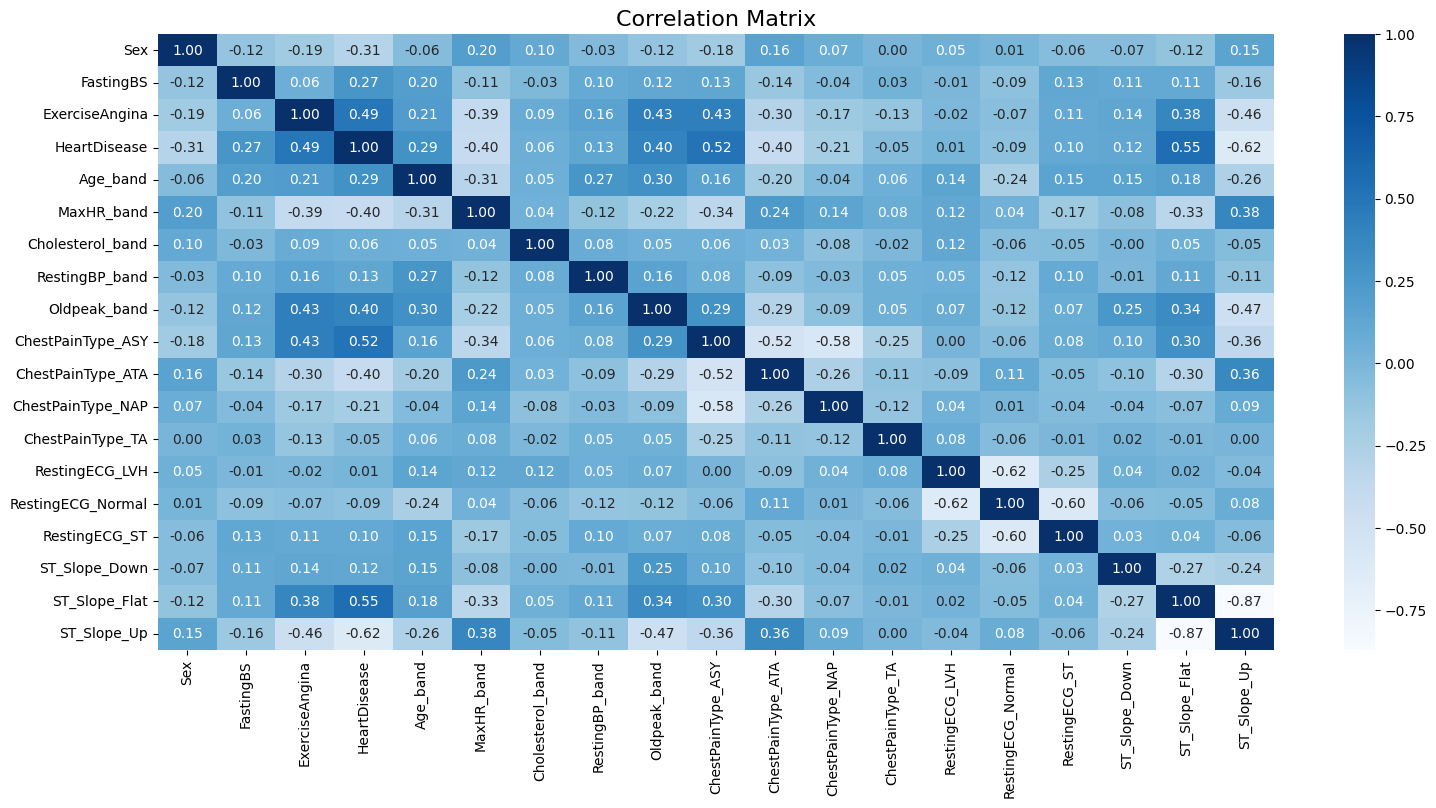

In [106]:
df_correlation = data.corr()

plt.figure(figsize=(18, 8))
heatmap = sns.heatmap(df_correlation, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix', fontsize=16)
plt.show()

# Conclusion

*To summarise what was observed:*

> Asymptomatic (ASY) chest pain type and flat ST slope are most correlated with detection of heart disease.

> The occurrence of exercise-induced angina is correlated with heart disease.

> Many patients with heart disease have asymptomatic chest pain, flat ST slope and exercise-induced angina simultaneously.

> Upsloping ST is negatively correlated with heart disease. Also majority of patients with an upsloping ST slope don't have exercise-induced angina.

> A lot of patients with a downsloping ST slope have asymptomatic chest pain. Many of them with heart disease.

> People without heart disease tend to have an oldpeak value of 0 (no abnormal ST segment deviations). Oldpeak also correlates a bit with exercise-induced angina.

> People with disease have lower average maximum heart rate.

> We can see that after age 50-55, people are more likely to have heart problems. Which makes sense.